In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns

In [2]:
IMAGE_SIZE=28
CHANNELS=3

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 18345 images belonging to 10 classes.


In [4]:
train_generator.class_indices

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [6]:
for image_batch, label_batch in train_generator:
    print(label_batch)
    print(image_batch[0])
    break

[4. 8. 8. 8. 3. 3. 9. 2. 6. 1. 2. 5. 4. 7. 2. 2. 9. 9. 2. 0. 9. 7. 9. 7.
 6. 9. 2. 2. 2. 2. 6. 1.]
[[[0.44546574 0.41801476 0.53958344]
  [0.41598383 0.38853285 0.5101015 ]
  [0.43785167 0.4104007  0.5319693 ]
  ...
  [0.46003374 0.42319313 0.52907544]
  [0.38767007 0.35038376 0.45626613]
  [0.37964815 0.34191617 0.44779855]]

 [[0.4579443  0.4304933  0.5520619 ]
  [0.4137555  0.3863045  0.5078731 ]
  [0.43517768 0.4077267  0.5292953 ]
  ...
  [0.44246835 0.40325266 0.509135  ]
  [0.40997782 0.37076214 0.47664452]
  [0.42290205 0.38368636 0.48956874]]

 [[0.44905508 0.4216041  0.5431727 ]
  [0.40896264 0.38151166 0.5030803 ]
  [0.45130754 0.42385656 0.54542524]
  ...
  [0.39464885 0.35543317 0.4583241 ]
  [0.42978057 0.3905649  0.49256447]
  [0.421313   0.3820973  0.4832056 ]]

 ...

 [[0.651492   0.62011945 0.7024724 ]
  [0.65505725 0.6236847  0.7060377 ]
  [0.6663795  0.6350069  0.7173599 ]
  ...
  [0.6348636  0.61917734 0.7093734 ]
  [0.6225921  0.6069058  0.7019028 ]
  [0.61357456 

In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'valid',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 4585 images belonging to 10 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 50 images belonging to 10 classes.


In [9]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

model = models.Sequential([
    
    layers.BatchNormalization(input_shape=input_shape),
    
    layers.Conv2D(32, kernel_size = (5,5), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.BatchNormalization(),
    layers.Conv2D(64,  kernel_size = (3,3),padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.BatchNormalization(),
    layers.Conv2D(64,  kernel_size = (3,3),padding='same',activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    
    layers.Dropout(0.33),
    layers.BatchNormalization(),
    layers.Dense(n_classes, activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 28, 28, 3)         12        
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                        

In [11]:
#### Early stopping for preventing Overfitting
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=3,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [12]:
model_history=model.fit(train_generator,
                        validation_data=validation_generator,batch_size=32,
                        epochs=150,callbacks=early_stopping)

Epoch 1/150
574/574 [==============================] - 178s 303ms/step - loss: 1.0891 - accuracy: 0.6286 - val_loss: 0.5731 - val_accuracy: 0.8107
Epoch 2/150
574/574 [==============================] - 149s 259ms/step - loss: 0.6538 - accuracy: 0.7800 - val_loss: 0.4413 - val_accuracy: 0.8458
Epoch 3/150
574/574 [==============================] - 139s 242ms/step - loss: 0.5448 - accuracy: 0.8159 - val_loss: 0.4392 - val_accuracy: 0.8517
Epoch 4/150
574/574 [==============================] - 145s 253ms/step - loss: 0.4718 - accuracy: 0.8412 - val_loss: 0.3043 - val_accuracy: 0.8901
Epoch 5/150
574/574 [==============================] - 139s 242ms/step - loss: 0.4244 - accuracy: 0.8544 - val_loss: 0.2690 - val_accuracy: 0.9088
Epoch 6/150
574/574 [==============================] - 133s 231ms/step - loss: 0.3815 - accuracy: 0.8701 - val_loss: 0.2899 - val_accuracy: 0.8984
Epoch 7/150
574/574 [==============================] - 133s 231ms/step - loss: 0.3642 - accuracy: 0.8744 - val_loss: 0

In [13]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

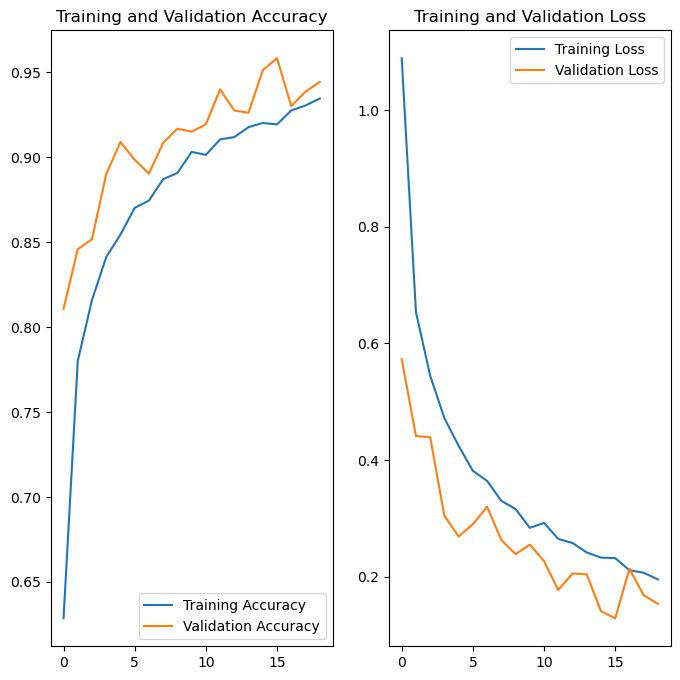

In [14]:
EPOCH=19
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCH), acc, label='Training Accuracy')
plt.plot(range(EPOCH), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCH), loss, label='Training Loss')
plt.plot(range(EPOCH), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
model.evaluate(test_generator)

2/2 [==============================] - 0s 80ms/step - loss: 0.1338 - accuracy: 0.9400


[0.1338476985692978, 0.9399999976158142]

In [16]:
test_labels=[]
test_image=[]
for image_batch, label_batch in test_generator:
    test_labels.append(label_batch)
    test_image.append(image_batch)
    break

In [17]:
predictions = model.predict(test_image)
predicted_label = [class_names[np.argmax(element)] for element in predictions]

actual_test_label = []
for element in test_labels:
    for i in range(len(predictions)):
         actual_test_label.append(class_names[int(element[i])])     

1/1 [==============================] - 0s 374ms/step


In [18]:
results=pd.DataFrame({"Actual":actual_test_label,
                      "Predictions":predicted_label})
results

,Actual,Predictions
0,Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite
1,Tomato___Bacterial_spot,Tomato___Bacterial_spot
2,Tomato___healthy,Tomato___healthy
3,Tomato___Early_blight,Tomato___Early_blight
4,Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Spider_mites Two-spotted_spider_mite
5,Tomato___Target_Spot,Tomato___Target_Spot
6,Tomato___Target_Spot,Tomato___Target_Spot
7,Tomato___Early_blight,Tomato___Early_blight
8,Tomato___Septoria_leaf_spot,Tomato___Septoria_leaf_spot
9,Tomato___Leaf_Mold,Tomato___Leaf_Mold


In [21]:
##Saving the model
import os
model.save("./Tomato_Leaf_Disease_Detection_model.h5")